In [3]:
import warnings
import pandas as pd
import numpy as np

import src.stlouisfed as fred
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
data_name = "GDP"
data1 = fred.get_series_observation(data_name)
data1.rename(columns={'lin': 'Close'}, inplace=True)
data1.index = data1.index.tz_localize('UTC').tz_convert('America/New_York')
data1 = data1[data1.index > '2012-01-01']

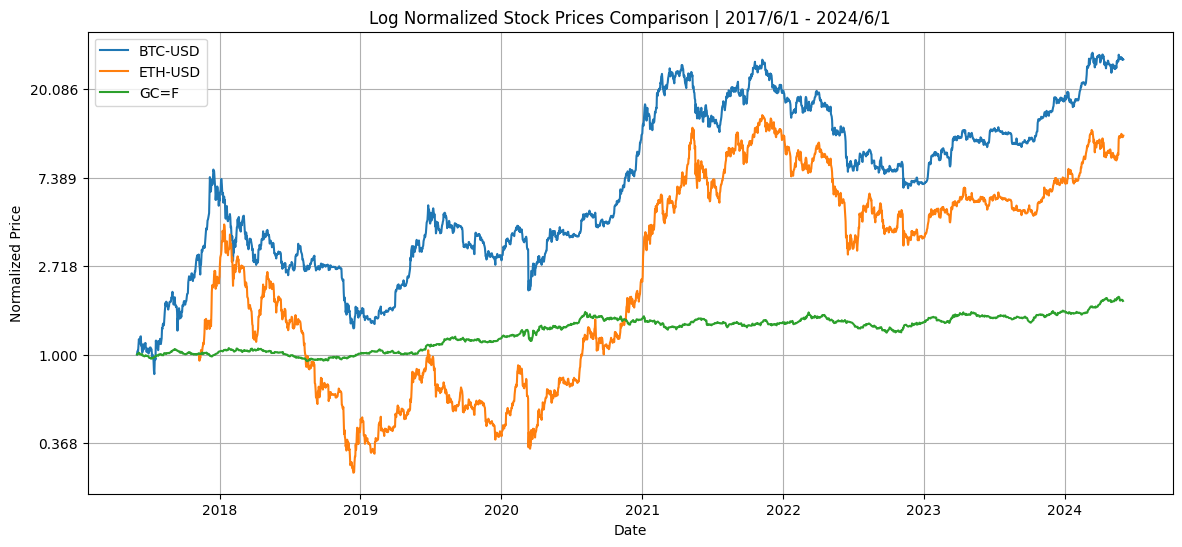

BTC-USD / ETH-USD correlation:0.92934468
BTC-USD / GC=F correlation:0.74710077
ETH-USD / GC=F correlation:0.66202565


In [6]:
plot = plotting.compare_assets(
    [
        #'XLE',
        'BTC-USD',
        'ETH-USD',
        'GC=F',
    ],
    start_date=[2017, 6, 1],
    end_date=[2024, 6, 1],
    log_scale=True,
)